In [1]:
import torch
import pandas as pd
import numpy as np

train_data_file = "Brunel_BdJPsiKs_MagU_30k.csv"
data = pd.read_csv(train_data_file)
features = data.drop(["is_true_seed","has_MCParticle",
                      "is_downstream_reconstructible",
                      "has_MCParticle_not_electron",
                     "is_downstream_reconstructible_not_electron",
                     "seed_mva_value"] , axis=1).astype(np.float64)

target = data.is_downstream_reconstructible
features = features.drop(features.columns[0], axis=1)

print(features.head())


   seed_chi2PerDoF        seed_p      seed_pt  seed_nLHCbIDs  seed_nbIT  \
0         1.447929   1849.101146  1083.522737           27.0        0.0   
1         0.354945  10085.622823  1345.148537           24.0        0.0   
2         2.906524   2441.534682  1013.888408           24.0        0.0   
3         3.234916   2604.073941   904.097232           24.0        0.0   
4         0.842265   2644.554049  1068.602364           23.0        0.0   

   seed_nLayers       seed_x      seed_y   seed_tx   seed_ty  
0          12.0 -1418.736880 -143.095899 -0.722093 -0.038671  
1          12.0  -393.699553 -284.193871 -0.129122 -0.037920  
2          12.0  -834.004914 -270.235334 -0.456235 -0.015198  
3          12.0  -475.119652 -230.380918 -0.369728 -0.018967  
4          12.0  -899.187260 -101.826800 -0.440227 -0.036610  


In [7]:

print(target.head())


0    False
1     True
2     True
3     True
4    False
Name: is_downstream_reconstructible, dtype: bool


In [3]:
print(features.head())
print(features.columns)


   seed_chi2PerDoF        seed_p      seed_pt  seed_nLHCbIDs  seed_nbIT  \
0         1.447929   1849.101146  1083.522737           27.0        0.0   
1         0.354945  10085.622823  1345.148537           24.0        0.0   
2         2.906524   2441.534682  1013.888408           24.0        0.0   
3         3.234916   2604.073941   904.097232           24.0        0.0   
4         0.842265   2644.554049  1068.602364           23.0        0.0   

   seed_nLayers       seed_x      seed_y   seed_tx   seed_ty  
0          12.0 -1418.736880 -143.095899 -0.722093 -0.038671  
1          12.0  -393.699553 -284.193871 -0.129122 -0.037920  
2          12.0  -834.004914 -270.235334 -0.456235 -0.015198  
3          12.0  -475.119652 -230.380918 -0.369728 -0.018967  
4          12.0  -899.187260 -101.826800 -0.440227 -0.036610  
Index(['seed_chi2PerDoF', 'seed_p', 'seed_pt', 'seed_nLHCbIDs', 'seed_nbIT',
       'seed_nLayers', 'seed_x', 'seed_y', 'seed_tx', 'seed_ty'],
      dtype='object')


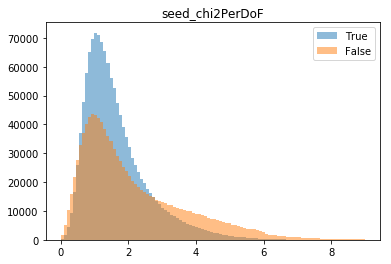

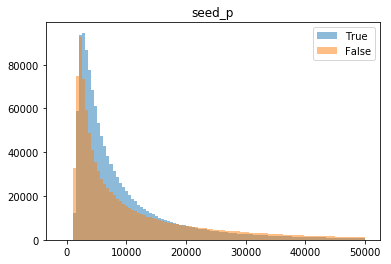

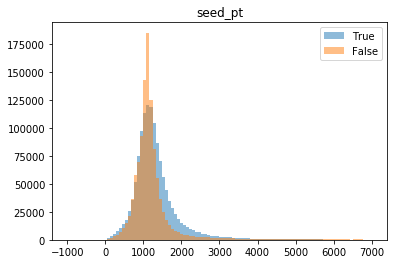

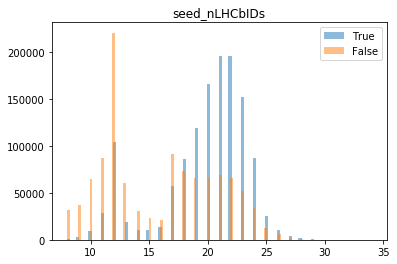

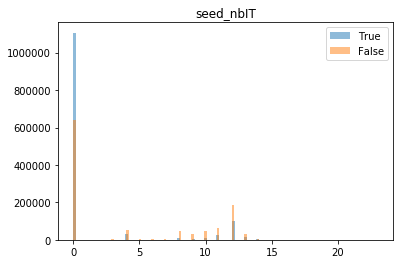

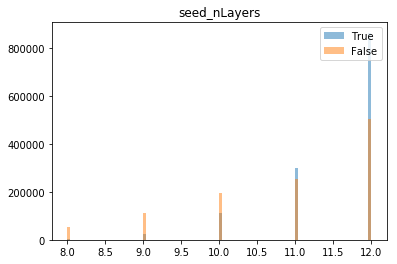

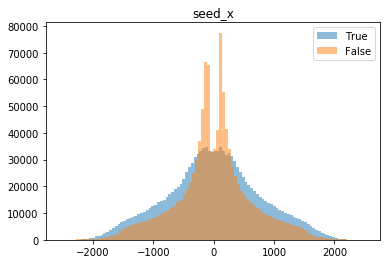

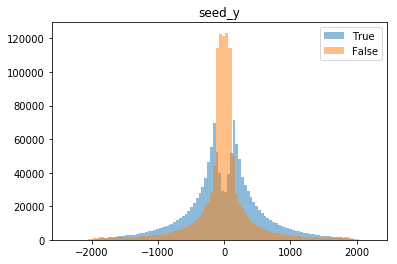

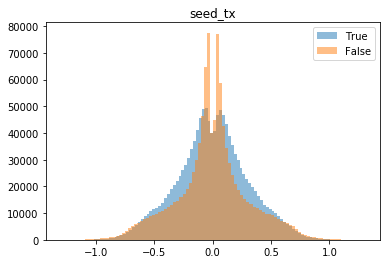

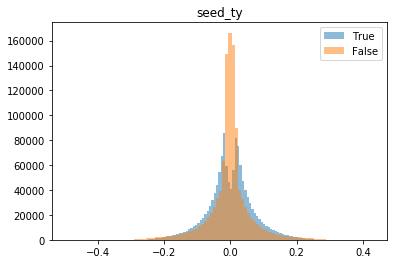

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pos = features[target==True]
neg = features[target==False]
    
def drawHist(coll, bins):
    
    plt.hist(pos[coll], bins = bins, alpha=0.5, label='True')
    plt.hist(neg[coll], bins = bins, alpha=0.5, label='False')
    plt.legend(loc='upper right')
    plt.title(coll)
    plt.show()
    
def drawHistWithRange(coll, bins, xmin, xmax):
    
    plt.hist(pos[coll], bins = bins, alpha=0.5, label='True', range=[xmin,xmax])
    plt.hist(neg[coll], bins = bins, alpha=0.5, label='False', range=[xmin,xmax])
    plt.legend(loc='upper right')
    plt.title(coll)
    plt.show()
    
for col in features.columns:
    #print(max(features[col]))
    #print(sum(features[col])/len(features[col]))
    if col=='seed_p':
        #features.hist(column=col, bins=100, range=[-1000, 50000])
        drawHistWithRange(col, 100, -1000, 50000)
    elif col=='seed_pt':
        #features.hist(column=col, bins=100, range=[-1000, 7000])
        drawHistWithRange(col, 50, -1000, 7000)
    else:
        #features.hist(column=col, bins=100)   
        drawHist(col, bins=100)
        

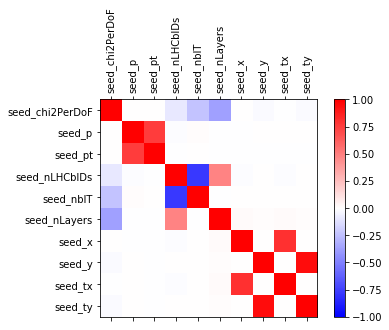

In [5]:
import numpy as np

corr = features.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr, cmap = 'bwr', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(features.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(features.columns)
ax.set_yticklabels(features.columns)
plt.show()